In [3]:
from tools import *
from figure_2D import *
from images import *
from RegularGrid import RegularGrid

In [4]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Python file**

In [5]:
import random
category_name = f'formatage/{random.randint(0, 999):0>3}'
# category_name = f'/test'
category_name

'formatage/736'

### **Rows**, **Columns** and more

In [30]:
degree = 3
rows = 2
cols = 10

In [31]:
experiment_name =f'u0_d7'
steps = 1
deployment = ['linear', 'incremental'][0]

In [32]:
folder_name , path = \
    create_dir_hierarchy(category_name,
                         degree,
                         rows,
                         cols,
                         deployment,
                         experiment_name)

In [33]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [34]:
undeployed_cells = grid.vline()
deployed_cells   = grid.vline(4)

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [35]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [36]:
# linear
# from helpers_images import get_indexes
# active_cells    = get_indexes(degree, rows, cols)
# target_percents = linear_height_ls(active_cells)

In [37]:
for c,p in zip(active_cells, target_percents):
    print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

cell:target percent - 04:100%
cell:target percent - 24:100%
cell:target percent - 00:  0%
cell:target percent - 20:  0%


In [38]:
# write meta-data
write_metadata(path, degree, rows, cols, deployment, steps, active_cells, target_percents)
# write path
with open("./paths.txt", "a") as f:
    f.write(path+'\n')

In [39]:
grid.generate_mesh(folder_name)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.009352
	plate edge length : 0.093524


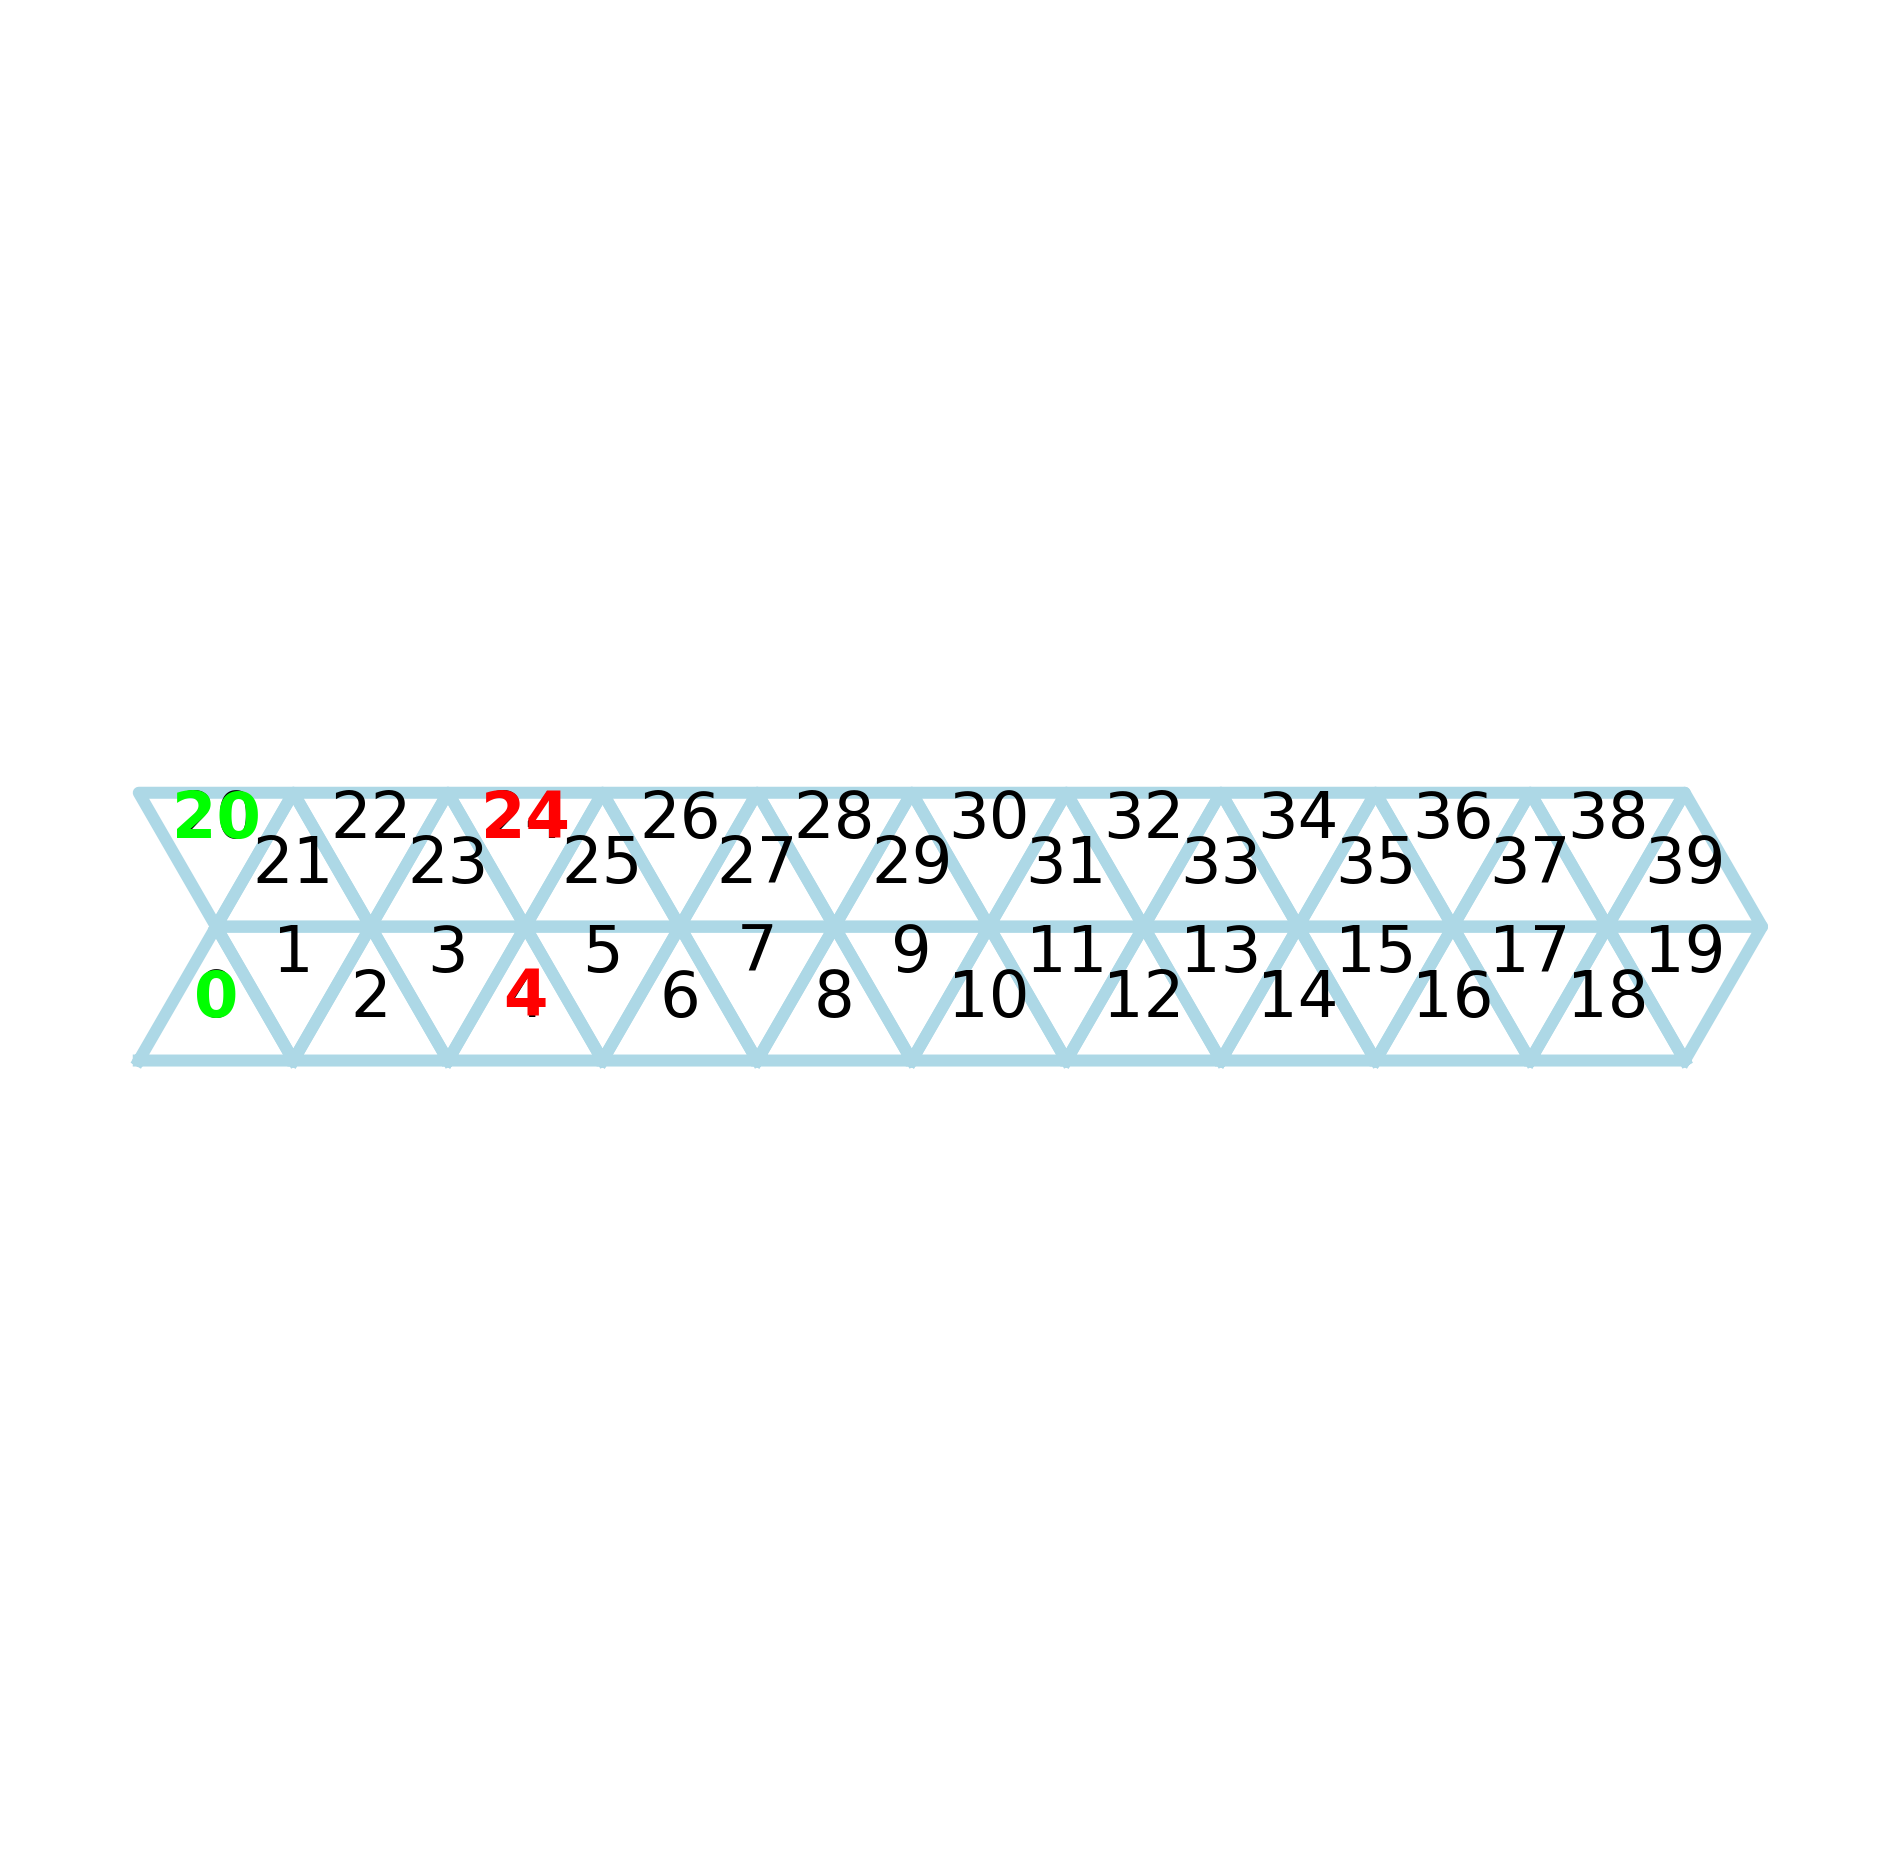

In [40]:
plot2D(grid.input_data, grid.curr_um, show_height=False, active_cells=active_cells, target_percents=target_percents, file_name = path+'/undeployed.png')

### **Step Deployments**

In [15]:
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.plate_thickness,
                active_cells,
                target_percents,
                path,
                deployment,
                steps=steps,
                verbose=True,
                dep=deployment,
                prj2D=(grid.rows==1 or grid.cols==1))

step  0/1 saved.
step  1/1 saved.


### **Images**

In [16]:
stress_type = 'maxBending'
verbose=True

In [17]:
# JPG and PNG
generate_2D(path,
            deployment,
            stress_type=stress_type,
            show_percent=False,
            show_plot=False,
            verbose=verbose)

Images for step 00 successfully saved.
Images for step 01 successfully saved.


In [18]:
# GIF:
fps  = 2 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...

path_base = f'{path}/{deployment}_deployment/stresses/{stress_type}'
for name in ['all', 'perSteps', 'own']:
    img_name_i = f'"{path_base}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path_base}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path_base}/png/*{name}*.png'
    gif_name_i = f'{path_base}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i

    if verbose: print(f'gif for {name} successfully saved.')

gif for all successfully saved.
gif for perSteps successfully saved.
gif for own successfully saved.


In [19]:
generate_1D([path],
            [deployment],
            stress_type=stress_type,
            show_percent=False,
            show_plot=False)

In [20]:
# GIF:

# Stresses
path_ = f'{path}/{deployment}_deployment/stresses/{stress_type}'
for graph in ['stress_curve','ordered_stress_scatter', 'stress_scatter']:
    img_name_i = f'"{path_}/jpg/{graph}*.jpg"'
    gif_name_i = f'"{path_}/jpg/gif/{graph}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path_}/png/{graph}*.png'
    gif_name_i = f'{path_}/png/gif/{graph}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i

# Energies and heights
path_ = f'{path}/{deployment}_deployment'
for graph in  ['energies', 'heights']:
    path_g = path_ + f'/{graph}'
    img_name_i = f'"{path_g}/jpg/{graph}*.jpg"'
    gif_name_i = f'"{path_g}/jpg/gif/{graph}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path_g}/png/{graph}*.png'
    gif_name_i = f'{path_g}/png/gif/{graph}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
    